<a align="left" href="https://ultralytics.com/yolov5" target="_blank">
<img width="1024", src="https://user-images.githubusercontent.com/26833433/125273437-35b3fc00-e30d-11eb-9079-46f313325424.png"></a>

This is the **official YOLOv5 🚀 notebook** by **Ultralytics**, and is freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/). 
For more information please visit https://github.com/ultralytics/yolov5 and https://ultralytics.com. Thank you!

# Setup

Clone repo, install dependencies and check PyTorch and GPU.

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.1-25-gcaf7ad0 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.2/78.2 GB disk)


## Train coco128

In [2]:
!python train.py --data coco128.yaml --weights "" --cfg yolov5s.yaml  --batch-size 16

train: weights=, cfg=yolov5s.yaml, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-25-gcaf7ad0 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale

# 2. Install yolort and inference for yolort

In [7]:
%cd ..
!git clone https://github.com/zhiqwang/yolov5-rt-stack.git
# %ls
# %pip install -e .

!pip install -U yolort

/content
Cloning into 'yolov5-rt-stack'...
remote: Enumerating objects: 3913, done.
remote: Counting objects: 100% (1393/1393), done.
remote: Compressing objects: 100% (767/767), done.
remote: Total 3913 (delta 1016), reused 666 (delta 626), pack-reused 2520
Receiving objects: 100% (3913/3913), 22.94 MiB | 10.19 MiB/s, done.
Resolving deltas: 100% (2391/2391), done.


In [13]:
!cp yolov5-rt-stack/test/assets/bus.jpg .
!ls

bus.jpg  datasets  yolov5  yolov5-rt-stack


In [15]:
# /content/yolov5/runs/train/exp/weights/best.pt
from yolort.models import YOLOv5
import matplotlib.pyplot as plt
import cv2

# Download checkpoint from https://github.com/ultralytics/yolov5/releases/download/v6.0/yolov5s.pt
ckpt_path_from_ultralytics = "/content/yolov5/runs/train/exp/weights/best.pt"
model = YOLOv5.load_from_yolov5(ckpt_path_from_ultralytics, score_thresh=0.25)
model.eval()

img_path = "bus.jpg"
predictions = model.predict(img_path)
print(predictions)

[{'scores': tensor([0.46984, 0.46766, 0.34996]), 'labels': tensor([0, 0, 0]), 'boxes': tensor([[200.38110, 339.02850, 362.56232, 784.60095],
        [ 19.77965, 335.49350, 216.69975, 890.08887],
        [ -4.89649, 485.44345,  89.41842, 858.39081]])}]


(1080, 810, 3)


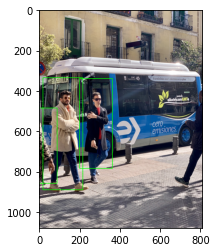

In [26]:
# 可视化
%matplotlib inline
img = cv2.imread(img_path, 1)

for prediction in predictions:
  scores = prediction['scores']
  labels = prediction['labels']
  boxes = prediction['boxes']
  for score, label, box in zip(scores, labels, boxes):
    x1, y1, x2, y2 = box
    cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)

print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()